<a href="https://colab.research.google.com/github/hugocfrias/MVP-Machine-Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Machine Learning**

**Título:** Modelo Supervisionado- Base de dados 'Mental Health Lifestyle'

**Nome:** Hugo Coelho de Frias

**Matrícula:** 4052025000248

**Linkedin:** https://www.linkedin.com/in/hugo-frias-7059b622/

**E-mail:** hugofrias2@hotmail.com

Dataset: [Mental_Health_Lifestyle](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


Link DataBase GitHub Raw : https://github.com/hugocfrias/MVP-Machine-Learning/blob/main/Mental_Health_Lifestyle_Dataset_CSV.csv


# 1. Escopo, objetivo e definição do problema

O Conjunto de Dados de '**Mental Health and Lifestyle Habits Dataset (2019-2024)**' é uma coleção abrangente de dados que visa compreender como diversos fatores de estilo de vida afetam o bem-estar mental. Esta base de dados captura aspectos como rotinas de exercícios, hábitos alimentares, padrões de sono, níveis de estresse e interações sociais, além de informações demográficas.

O objetivo é identificar 'níveis de stress e bem-estar' de acordo com hábitos do cotidiano.


## 1.1. Hipóteses do Problema

Hipóteses levantadas:

1. Podemos segregar os diferentes níveis de stress e bem-estar de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários, por exemplo?

2. Existe alguma correlação entre os atributos numéricos (exemplo: horas de sonos e horas trabalhadas)?

3. Há algum padrão facilmente de ser identificado apenas com uma análise gráfica?

4. Premissas: De maneira empírica, pela natureza dos atributos do dataset original, creio que há uma correlação entre alguns desses atributos (exemplos: horas de sono vs horas trabalhadas / horas de sono vs horas de tela).


## 1.2. Tipo de Problema

O problema foi identificado como do tipo de **classificação supervisionada**. De acordo com os atributos numéricos (horas de sono, horas trabalhadas, idade, score de felididade etc), o objetivo é a previsão dos '**níveis de stress**' e  bem-estar' dos indivíduos.

# 2. Reprodutibilidade e ambiente

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.


*Observações Iniciais Importações e Carga de Dados*


---


<<EDITAR!!!>> Além da importação das bibliotecas pandas, numpy, matplotlib e seaborn, realizei  importação das paletas de cores 'viridis' e 'inferno'. O objetivo é uma melhor visualização dos gráficos que virão a seguir.


---


## 2.1. Bibliotecas Utilizadas

In [168]:
# Tratamento de warnings
import warnings
warnings.filterwarnings("ignore")

In [169]:
# Imports de Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform

# 3. Dados: carga, entendimento e qualidade

Demonstração o carregamento do dataset **'Mental Health Lifestyle'**.



## 3.1. Seleção de Dados

O dataset '**Mental Health Lifestyle**' foi coletado de acordo com as orientações do guia do MVP.

Fonte: https://www.kaggle.com/datasets.

## 3.2. Atributos do Dataset

O dataset '**Mental Health Lifestyle**' possui 3000 instâncias, de maneira balanceada em relação aos atributos categóricos (Países, Gêneros, Tipo de Dieta etc). No total, possui 12 atributos:

---
1. Country:	País do respondente (Australia, Brazil, Canada, Germany, India, Japan, USA)
2. Age: Idade do respondente (Anos)
3. Gender:	Identidade de gênero do respondente (Female, Male, Other)
4. Exercise Level: Nível de exercício físico do respondente (High, Low, Moderate)
5. Diet Type:	Classificação da dieta do respondente (Balanced, Junk Food, Keto, Vegan, Vegetarian)
6. Sleep Hours:	Horas de sono diária do respondente (Horas)
7. Stress Level: Nível de stress do respondente (High, Low, Moderate)
8. Mental Health Condition: Condição de saúde mental do respondente (Anxiety, Bipolar, Depression, None, PTSD)
9. Work Hours per Week: Horas de trabalho diária do respondente (Horas)
10. Screen Time per Day: Tempo de tela diária do respondente (Horas)
11. Social Interaction Score: Pontuação de interação Social do respondente (Escala 1-10)
12. Happiness Score: Pontuação de Felicidade do respondente (Escala 1-10)
---



## 3.3. Carga do Dataset

In [170]:
# importação dos dados uma url para um dataframe

url_dados = 'https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv'

# Carga do dataset através da url
Mental_Health_Lifestyle = pd.read_csv(url_dados)

In [171]:
# Exibição as primeiras linhas
Mental_Health_Lifestyle.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


>**Com o objetivo de facilitar as próximas análises, realizei uma reordenação dos atributos. Nesse caso, iniciando o dataframe (df) com os atributos categóricos e, posteriormente, os atributos núméricos**


In [172]:
# Reordenação das colunas com o objetivo de iniciar o df com os atributos categóricos
new_order = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Mental Health Condition', 'Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score', 'Stress Level' ]
df = Mental_Health_Lifestyle[new_order]

In [173]:
# === Verificações iniciais ===
display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

,Country,Gender,Exercise Level,Diet Type,Mental Health Condition,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
1306,Brazil,Other,High,Vegan,NaN,39,9.1,31,6.4,9.6,1.2,Low
2037,Brazil,Female,Moderate,Balanced,Depression,34,5.5,55,4.4,9.1,1.9,High
568,USA,Other,High,Vegan,PTSD,63,9.1,58,6.9,8.9,9.6,Moderate
1897,India,Female,Low,Balanced,PTSD,33,3.5,30,6.9,5.6,4.9,Low
2498,Japan,Female,Moderate,Junk Food,PTSD,42,6.3,50,5.0,8.6,6.3,Low



Formato: (3000, 12)

Tipos:
Country                         object
Gender                          object
Exercise Level                  object
Diet Type                       object
Mental Health Condition         object
Age                              int64
Sleep Hours                    float64
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
Stress Level                    object
dtype: object

Valores ausentes por coluna:
Country                          0
Gender                           0
Exercise Level                   0
Diet Type                        0
Mental Health Condition        595
Age                              0
Sleep Hours                      0
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
Stress Level                     0
dtype: int64


## 3.4. Análise exploratória resumida (EDA)

**Importante:** A análise exploratória mais detalhada do dataset foi realizada no MVP de **'Análise de Dados e Boas Práticas'**.

Link MVP **'Análise de Dados e Boas Práticas'**: https://github.com/hugocfrias/hugocfrias-MVP/blob/main/Untitled5.ipynb


### 3.4.1 Balanceamento de classes

>**Análise de balanceamento do atributo categórico 'Gênero'**



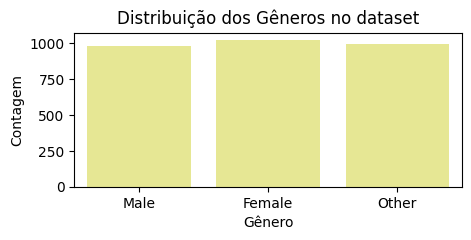

In [174]:
#Exemplo 1 de balenceamento das variáveis categóricas (Gênero).
plt.figure(figsize=(5, 2))
# gráfico de barras simples
sns.countplot(x='Gender', data=df, color='#f3f586')
plt.title('Distribuição dos Gêneros no dataset')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

>**Análise de balanceamento do atributo categórico 'Países'**

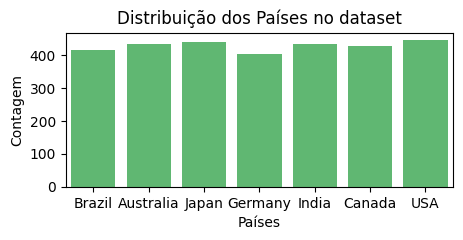

In [175]:
#Exemplo 2 de balenceamento das variáveis categóricas (Países).
plt.figure(figsize=(5, 2))
# gráfico de barras simples
sns.countplot(x='Country', data=df, color='#52c569')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.show()

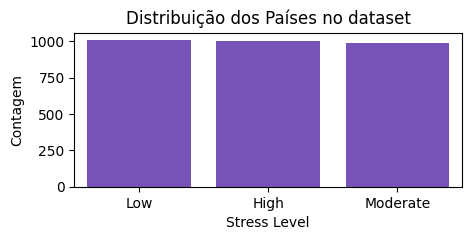

In [176]:
#Exemplo 3 de balenceamento das variáveis categóricas (Variável Target:Stress Level).
plt.figure(figsize=(5, 2))
# gráfico de barras simples
sns.countplot(x='Stress Level', data=df, color='#7442c8')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Stress Level')
plt.ylabel('Contagem')
plt.show()

*Comentários Total e Tipo de Instâncias:*


---


>Os gráficos de barras acima mostram que o dataset é balanceado em relação às classes 'Gênero' e 'Países'. Estes atributos foram utilizados como exemplos, porém os demais têm o mesmo comportamento. Esse balanceamento é essencial para que um modelo construído a partir desses dados não desfavoreça algum tipo dessas classes.


---

### 3.4.2 Estatísticas Descritivas

*Observações Iniciais Estatísticas Descritivas*


---


Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.


---

In [177]:
# Estatísticas descritivas básicas do dataset
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


### 3.4.3 Histogramas

*Observações Iniciais Histograma*


---


A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.


---


**Histograma dos atributos numéricos**


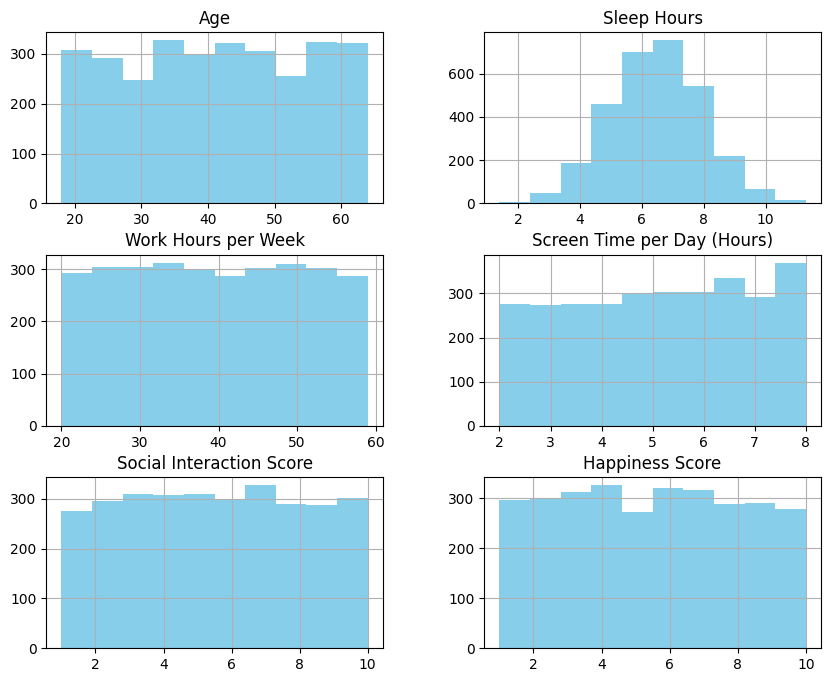

In [178]:
# Histogramas Variáveis Categóricas
df.hist(figsize = (10,8),color='skyblue',grid=1)
plt.show()

Podemos analisar que o atributo 'Horas de Sono' é o único com uma distribuição normal. Sendo os demais, distribuições uniformes.


**Densidade dos atributos numéricos**

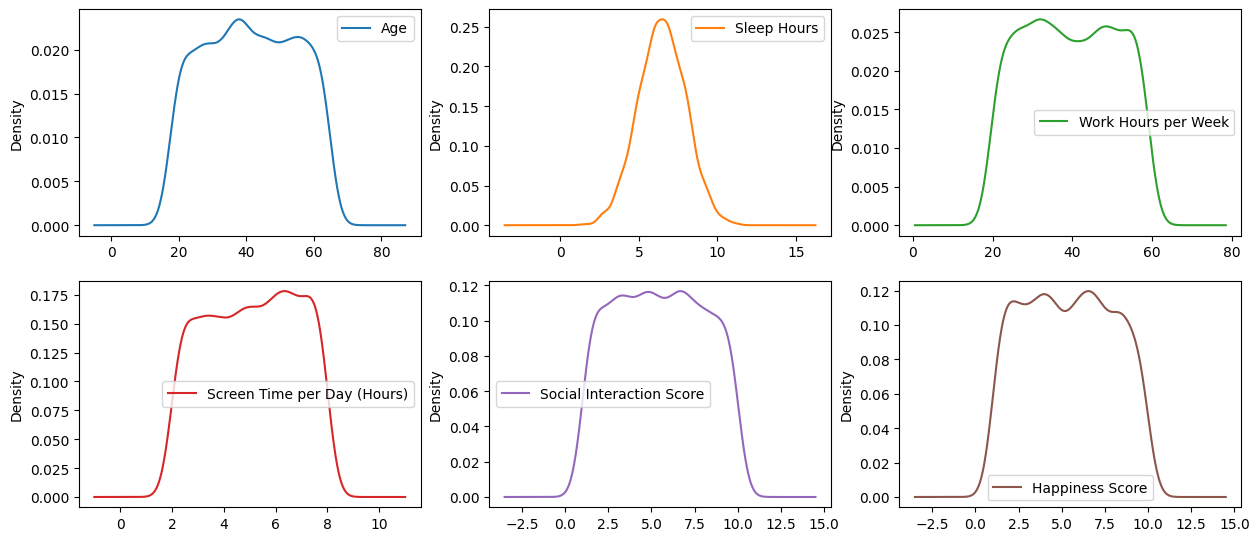

In [179]:
# Densidade Variáveis Numéricas
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

As densidade confiram as análises dos histogramas. O 'formato de sino' do atributo 'Horas de Sono' demonstra sua distribuição normal.

### 3.4.4 Boxplot

*Observações Iniciais Boxplot*


---


Para entender as diferenças entre os atributos categóricos, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a média, mediana e desvio padrão.


---


**Boxplots dos atributos numéricos**

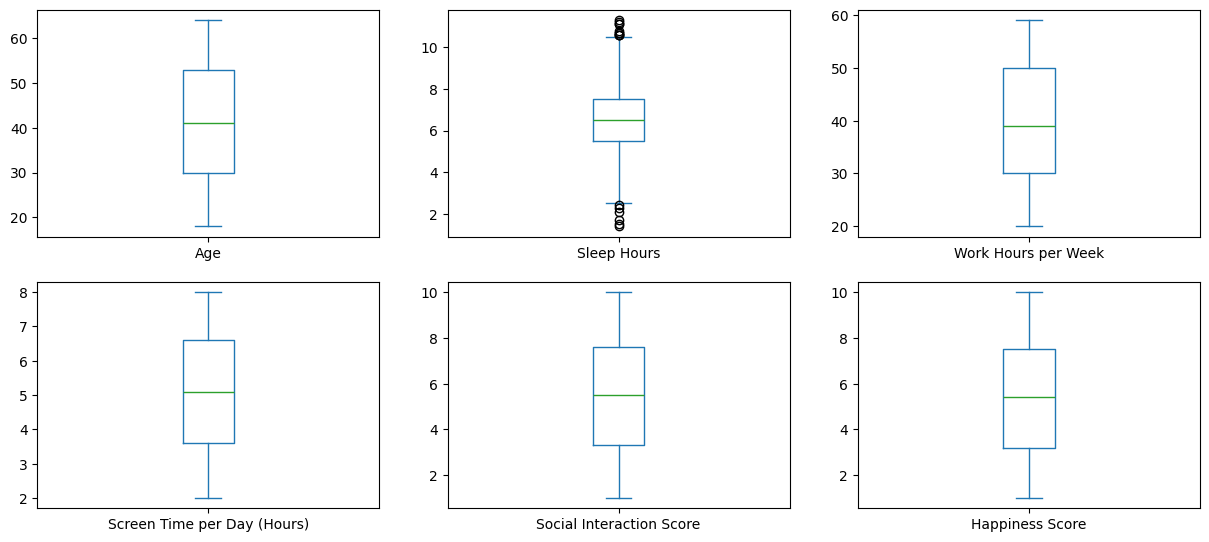

In [180]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Com uma análise inicial dos boxplots, se destacam os *outliers* do atributo 'Horas de Sono'

# 4. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

### *4.1. Tratamento de Nulos*

A limpeza consiste na verificação da consistência das informações, correção de possíveis erros de preenchimento ou eliminação de valores desconhecidos, redundantes ou não pertencentes ao domínio.

>**No dataframe 'df', podemos ver abaixo que há 595 instâncias com valores nulos no atributo 'Mental Health Condition'. Analisando o dataset original, as 595 linhas nulas estão com o status de 'None'. Por ser tratar de um estado de desordem mental (Mental Health Condition), tive a dúvida se realmente são informações faltantes ou simplesmente instâncias nas quais o respondente não
possuía algum tipo de desordem mental.**

>**Com a impossibilidade de pesquisar essa dúvida, optei por exluir do dataframe o atributo 'Mental Health Condition'.**

>**Dessa forma, foi criado o dataframe 'df_cleaned'.**

In [181]:
# Verificar a presença de valores nulos no dataset df
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
Country,0
Gender,0
Exercise Level,0
Diet Type,0
Mental Health Condition,595
Age,0
Sleep Hours,0
Work Hours per Week,0
Screen Time per Day (Hours),0
Social Interaction Score,0


In [182]:
# Criação do novo DataFrame com a limpeza dos dados (exclusão coluna 'Mental Health Condition')
df_cleaned = df.dropna(axis=1, how='any')

As demonstrações do datraframe após a limpeza podem ser vistas nos código que exibem as primeiras do dataframe 'df_cleaned';

In [183]:
# Exibição das primeiras linhas df_cleaned
df_cleaned.head()

,Country,Gender,Exercise Level,Diet Type,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
0,Brazil,Male,Low,Vegetarian,48,6.3,21,4.0,7.8,6.5,Low
1,Australia,Male,Moderate,Vegan,31,4.9,48,5.2,8.2,6.8,Low
2,Japan,Female,Low,Vegetarian,37,7.2,43,4.7,9.6,9.7,High
3,Brazil,Male,Low,Vegan,35,7.2,43,2.2,8.2,6.6,Low
4,Germany,Male,Low,Balanced,46,7.3,35,3.6,4.7,4.4,Low


Abaixo verificamos que não há mais a presença de nulos no dataframde 'df_cleaned'

In [184]:
# Verificação da presença de valores nulos no dataset df_cleaned
print("Valores nulos no dataset Iris:")
df_cleaned.isnull().sum()

Valores nulos no dataset Iris:


,0
Country,0
Gender,0
Exercise Level,0
Diet Type,0
Age,0
Sleep Hours,0
Work Hours per Week,0
Screen Time per Day (Hours),0
Social Interaction Score,0
Happiness Score,0


*Comentários Tratamento de Nulos:*:


---


> Como citado anteriormente, optei pela remoção do atributo categórico 'Mental Health Condition' pela presença de linhas 'None';

> Após a limpeza foi criado o dataframe 'df_cleaned';

---


# 5. Definição do target, variáveis e divisão dos dados
**Separação em conjunto de treino e conjunto de teste com holdout**

In [185]:
# Preparação dos dados

test_size = 0.20 # tamanho do conjunto de teste
seed = 42 # semente aleatória

target = "Stress Level"
features = [c for c in df_cleaned.columns if c not in [target]]

X = df_cleaned[features].copy()
y = df_cleaned[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) # faz a divisão

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [186]:
print("Treino:", X_train.shape, "| Teste:", X_test.shape)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Treino: (2400, 10) | Teste: (600, 10)
Dimensões de X_train: (2400, 10)
Dimensões de X_test: (600, 10)
Dimensões de y_train: (2400,)
Dimensões de y_test: (600,)


Defina, se necessário, funções em Python para reutilizar seu código e torná-lo mais organizado. Essa é uma boa prática de programação que facilita a leitura, manutenção e evolução do seu projeto.

In [187]:
def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

 Tratamento de dados e **Pipeline**

In [188]:
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:24], "...")
print("cat_cols:", cat_cols[:24], "...")

num_cols: ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score'] ...
cat_cols: ['Country', 'Gender', 'Exercise Level', 'Diet Type'] ...


Baseline e modelos candidatos

In [189]:
# === Baselines ===
baseline = Pipeline(steps=[("pre", preprocess),
                               ("KNN", KNeighborsClassifier())])
candidates = {
        "LR": Pipeline([("pre", preprocess), ("model", LogisticRegression(max_iter=200, random_state=seed))]),
        "RF": Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=seed))]),
        "CART": Pipeline([("pre", preprocess), ("model", DecisionTreeClassifier())]),
        "NB": Pipeline([("pre", preprocess), ("model", GaussianNB())]),
        "SVM": Pipeline([("pre", preprocess), ("model", SVC())]),
        "CART": Pipeline([("pre", preprocess), ("model", DecisionTreeClassifier())])

             }
baseline


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Sleep Hours',
                                                   'Work Hours per Week',
                                                   'Screen Time per Day '
                                                   '(Hours)',
                                                   'Social Interaction Score',
                                                   'Happiness Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'Gender',
                                                   'Exercise Level',
                                                   'Diet Type'])])),
                ('KNN', KNeighborsClassifier())])

Treino e avaliação rápida (baseline vs candidatos)

In [190]:
results = {}

# Baseline

baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
results["baseline"] = evaluate_classification(y_test, y_pred, proba)

# Candidatos
for name, pipe in candidates.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
  results[name] = evaluate_classification(y_test, y_pred, proba)


pd.DataFrame(results).T


,accuracy,f1_weighted,roc_auc
baseline,0.346667,0.337802,NaN
LR,0.303333,0.302643,NaN
RF,0.311667,0.311868,NaN
CART,0.355000,0.355531,NaN
NB,0.323333,0.323019,NaN
SVM,0.351667,0.351392,NaN


Validação e Otimização de Hiperparâmetros

Use **validação cruzada** apropriada ao problema (Ex: **`StratifiedKFold`** para classificação; **`KFold`** para regressão).  
Faça **tuning** com `GridSearchCV`/`RandomizedSearchCV`.


In [191]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
model = Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=seed))])
param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
             }
scorer = "f1_weighted"

# Executar busca aleatória (exemplo geral — ajuste para seu caso)
search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=cv, scoring=scorer, random_state=seed, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
print("Melhor score (CV):", search.best_score_)
print("Melhores parâmetros:", search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor score (CV): 0.33509742075383964
Melhores parâmetros: {'model__max_depth': 14, 'model__min_samples_split': 2, 'model__n_estimators': 148}


Avaliação final, análise de erros e limitações

              precision    recall  f1-score   support

        High       0.31      0.30      0.30       205
         Low       0.32      0.39      0.35       192
    Moderate       0.37      0.30      0.33       203

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600



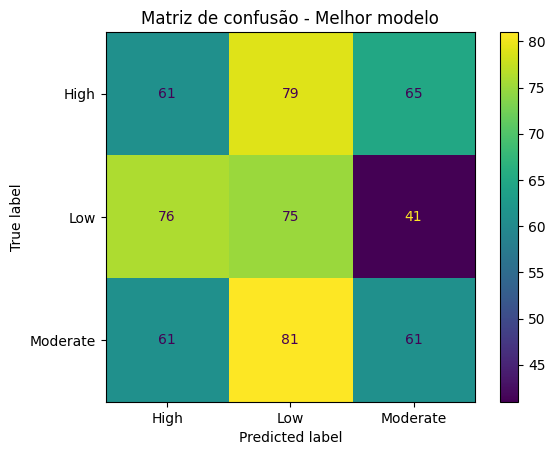

In [192]:
# Exemplo de re-treino no conjunto de treino+validação (se aplicável) e avaliação no teste

if 'search' in globals() and hasattr(search, "best_estimator_"):
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    print(classification_report(y_test, y_pred))
    try:
            ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
            plt.title("Matriz de confusão - Melhor modelo")
            plt.show()
    except Exception as e:
            print("Não foi possível plotar a matriz de confusão:", e)